<a href="https://colab.research.google.com/github/meher-chinmaya/Practice-DL/blob/main/Softmax_Classifier_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [3]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape[0]}")
print(f"Test data shape: {x_test.shape[0]}")

Training data shape: 60000
Test data shape: 10000


In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

# 🔁 List to store test losses per epoch
test_losses = []

# ✅ Custom Callback to evaluate on test data after each epoch
class TestLossTracker(Callback):
    def on_epoch_end(self, epoch, logs=None):
        test_loss, _ = self.model.evaluate(x_test, y_test, verbose=0)
        test_losses.append(test_loss)

In [5]:
# Build a simple softmax classifier model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 🚀 Train the model + track test loss
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[TestLossTracker()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6273 - loss: 1.4243 - val_accuracy: 0.8830 - val_loss: 0.5831
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8533 - loss: 0.6190 - val_accuracy: 0.8972 - val_loss: 0.4469
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8720 - loss: 0.5068 - val_accuracy: 0.9048 - val_loss: 0.3936
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8790 - loss: 0.4635 - val_accuracy: 0.9082 - val_loss: 0.3642
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8877 - loss: 0.4269 - val_accuracy: 0.9115 - val_loss: 0.3451


In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8855 - loss: 0.4408
Test Accuracy: 0.8996


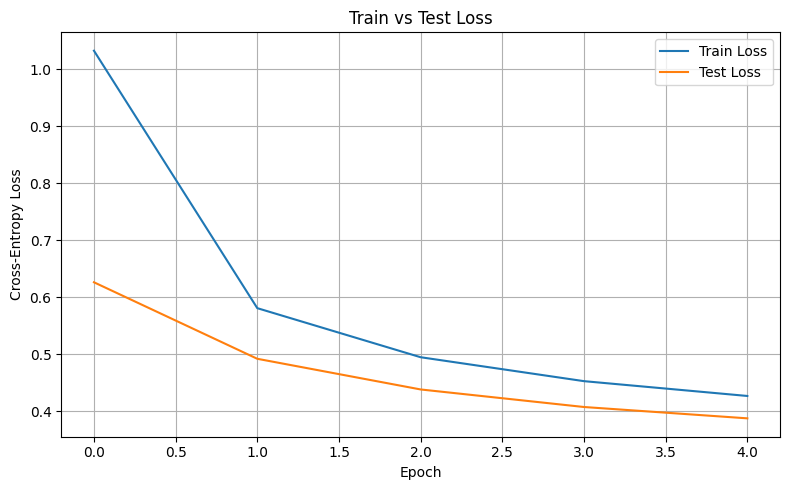

In [7]:
# 📊 Plot Train vs Test Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Train vs Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()